# Лабораторные работы 15-17. Кластеризация
## k-Means
### Задача 1: Сегментация
Используйте встроенный в библиотеку seaborn датасет "penguins" для задачи кластеризации. Ваша задача - сегментировать пингвинов с использованием K-means.
Попробуйте иерархическую классификацию и DBSCAN на тех же данных и сравните результаты.

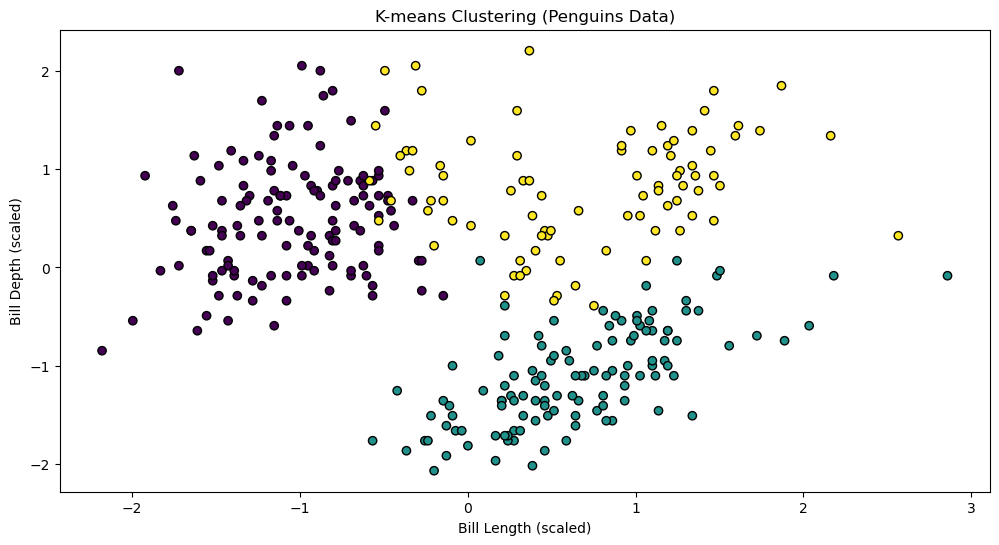

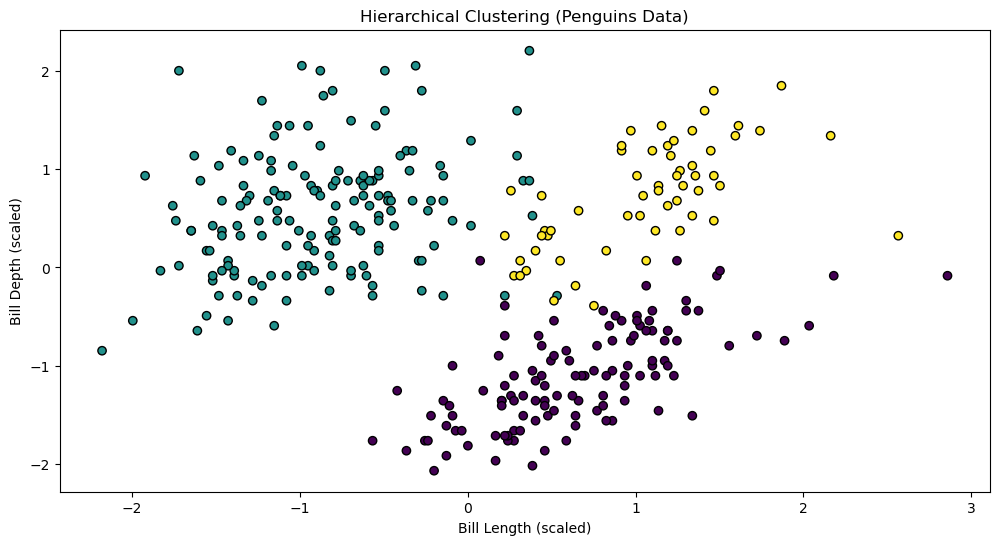

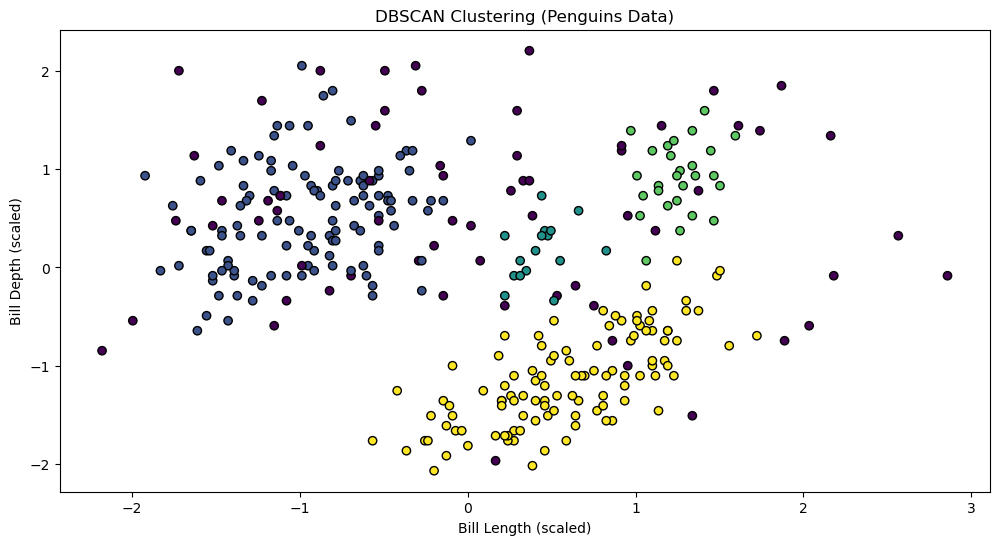

Silhouette Score for K-means: 0.45
Silhouette Score for Hierarchical: 0.45
Silhouette Score for DBSCAN: 0.25


In [1]:
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

# Загружаем данные
data = sns.load_dataset("penguins").dropna()

# Подготовка данных для кластеризации
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = data[features]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means кластеризация
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Визуализация K-means
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title("K-means Clustering (Penguins Data)")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Bill Depth (scaled)")
plt.show()

# Иерархическая кластеризация
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(X_scaled)

# Визуализация иерархической кластеризации
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k')
plt.title("Hierarchical Clustering (Penguins Data)")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Bill Depth (scaled)")
plt.show()

# DBSCAN кластеризация
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

# Визуализация DBSCAN
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering (Penguins Data)")
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Bill Depth (scaled)")
plt.show()

# Оценка качества кластеризации с помощью Silhouette Score
silhouette_scores = {
    'K-means': silhouette_score(X_scaled, kmeans_labels),
    'Hierarchical': silhouette_score(X_scaled, hierarchical_labels),
    'DBSCAN': silhouette_score(X_scaled, dbscan_labels)
}

for method, score in silhouette_scores.items():
    print(f"Silhouette Score for {method}: {score:.2f}")

### Задача 2: Кластеризация текстовых данных (новостных заголовков)
Вам нужно скачать News Aggregator Dataset с Kaggle, предварительно обработать текст новостных заголовков и провести кластеризацию с использованием K-Means. Целью этой задачи является группировка похожих новостей в одном кластере.

[nltk_data] Downloading package punkt to /home/rymasz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rymasz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


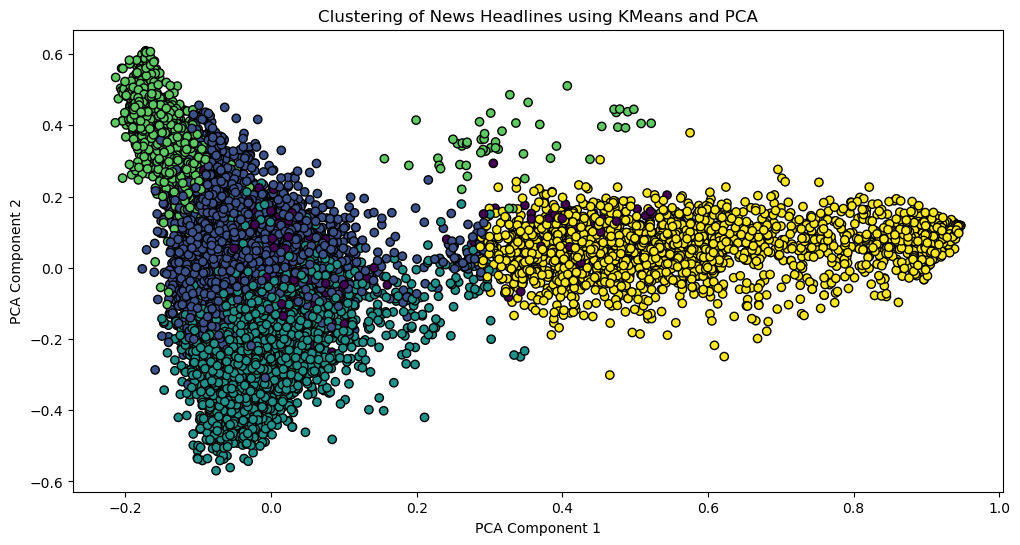

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузка данных
nltk.download('punkt')
nltk.download('stopwords')
data = pd.read_csv("data/uci-news-aggregator.csv")

# Преобразуем столбцы
data.columns = ['ID', 'Title', 'URL', 'Publisher', 'Category', 'Story', 'Hostname', 'Timestamp']

# Сэмплируем 10% данных
data_sampled = data.sample(frac=0.1, random_state=42)

# Функция для предобработки текста
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

# Применяем предобработку
data_sampled['cleaned_title'] = data_sampled['Title'].apply(preprocess_text)

# Векторизация текста с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data_sampled['cleaned_title'])

# Применяем LSA для уменьшения размерности
lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
X_reduced = lsa.fit_transform(X)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data_sampled['Cluster'] = kmeans.fit_predict(X_reduced)

# Визуализация с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_sampled['Cluster'], cmap='viridis', edgecolor='k')
plt.title("Clustering of News Headlines using KMeans and PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### Задача 3:
Примените алгоритм K-Means к датасету Wine Recognition Data Set, чтобы выделить кластеры вин на основе их химического анализа.

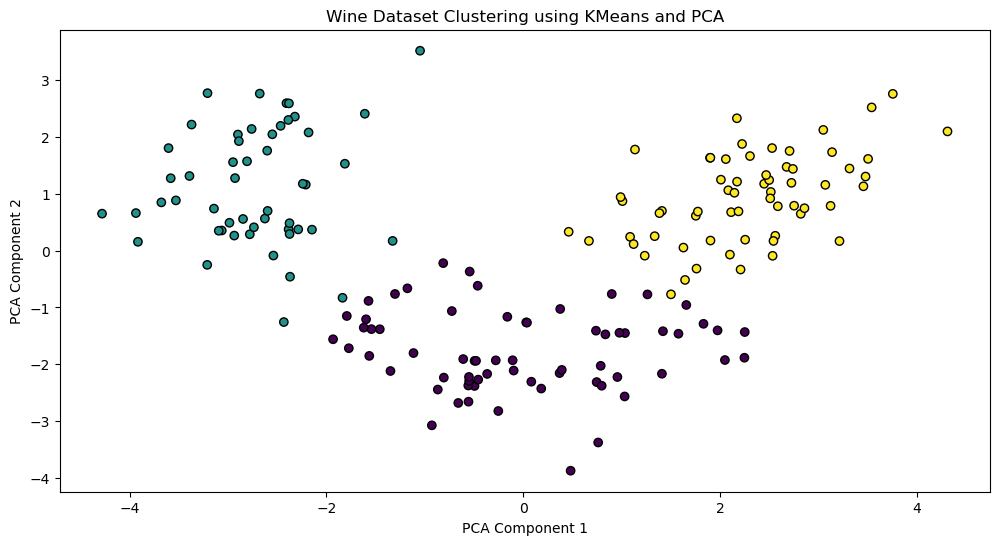

In [5]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузка данных
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))

# Применяем KMeans для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Снижение размерности с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация результатов кластеризации
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k')
plt.title("Wine Dataset Clustering using KMeans and PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### Задача 4:
Разделите датасет Wholesale Customers Data на категории. В этом датасете содержатся данные о расходах клиентов оптового дистрибьютора на разные категории продуктов. Цель - сегментировать клиентов по их годовым расходам на разные категории продуктов.

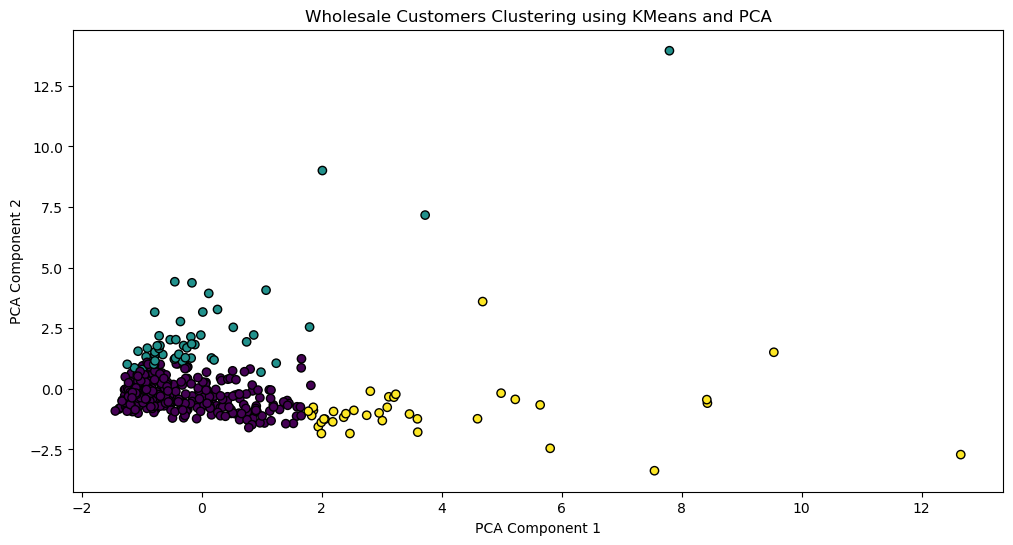

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Удаляем несущественные признаки
data.drop(columns=['Channel', 'Region'], inplace=True)

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.title("Wholesale Customers Clustering using KMeans and PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Иерархические алгоритмы
### Задача 1:
Примените иерархическую кластеризацию к набору данных Iris. Используйте дендрограмму для определения оптимального числа кластеров и сравните свои результаты с фактическими метками.

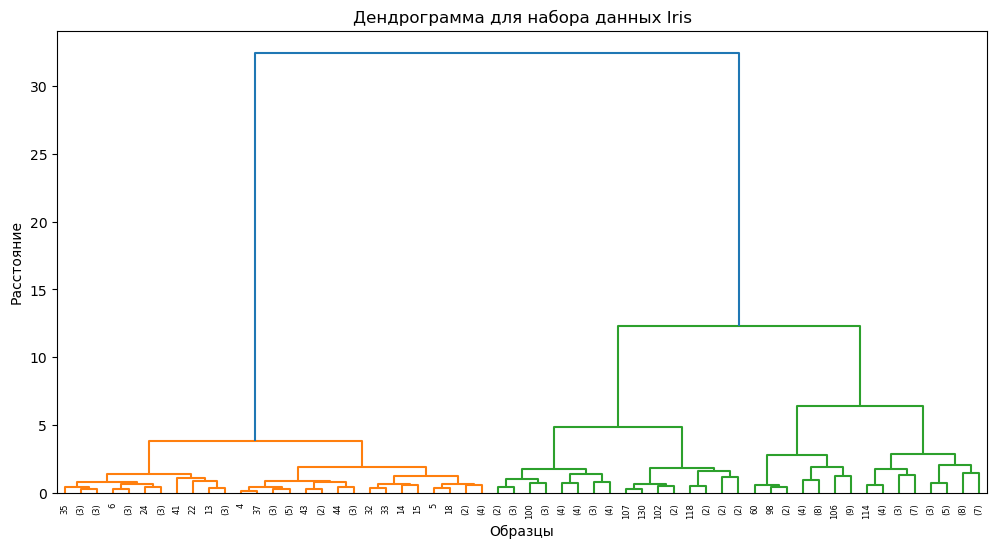

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  Cluster  
0       0        2  
1       0        5  
2       0        5  
3       0        5  
4       0        2  
Adjusted Rand Index: 0.44


In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Загрузка данных Iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Иерархическая кластеризация для визуализации
link = linkage(data.drop(columns='target'), method='ward')

plt.figure(figsize=(12, 6))
dendrogram(link, truncate_mode='level', p=5)
plt.title("Дендрограмма для набора данных Iris")
plt.xlabel("Образцы")
plt.ylabel("Расстояние")
plt.show()

# Выполнение кластеризации с агломеративным методом
n_clusters = 6
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
predicted_clusters = cluster_model.fit_predict(data.drop(columns='target'))

# Добавляем метки кластеров в DataFrame и выводим результат
data['Cluster'] = predicted_clusters
print(data.head())

# Оценка кластеризации с помощью Adjusted Rand Index
ari_score = adjusted_rand_score(data['target'], data['Cluster'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

### Задача 2:
Текстовый анализ. Используйте датасет 20 News Groups, который включает в себя около 20 000 сообщений, сгруппированных примерно на 20 новостных групп. Ваша задача заключается в иерархической кластеризации данных с использованием любой техники векторизации текста.

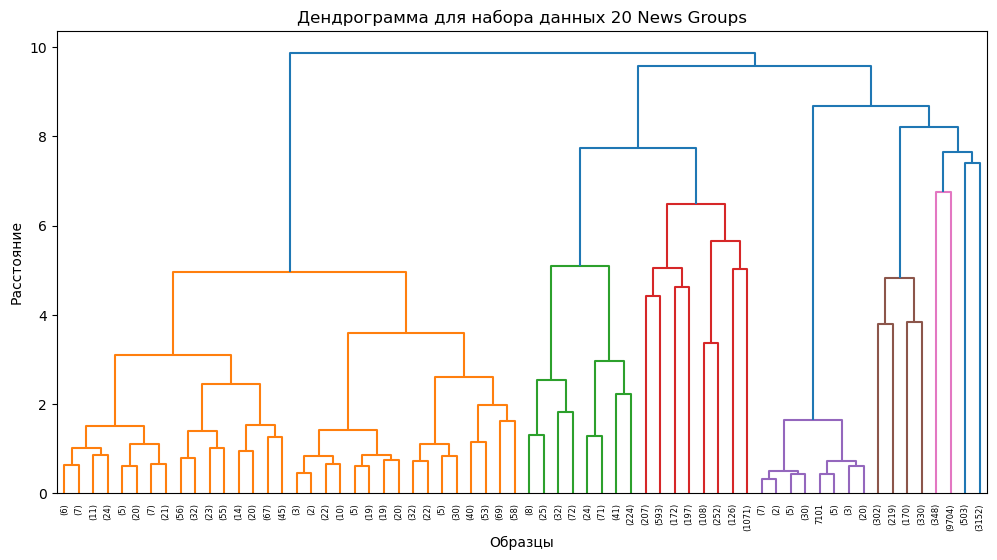

Пример кластеризации для первых 5 текстов:
["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n", 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Gr

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Загрузка данных
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Преобработка текста
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

# Применяем предобработку к данным
processed_texts = [preprocess_text(text) for text in newsgroups.data]

# Векторизация текста
vectorizer = TfidfVectorizer(max_features=5000)  # Снижаем количество признаков для ускорения
X = vectorizer.fit_transform(processed_texts)

# Уменьшаем размерность с помощью Truncated SVD
svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X)

# Строим дендрограмму
link = linkage(X_reduced, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(link, truncate_mode='level', p=5)
plt.title("Дендрограмма для набора данных 20 News Groups")
plt.xlabel("Образцы")
plt.ylabel("Расстояние")
plt.show()

# Кластеризация
n_clusters = 20  # Определим количество кластеров равным числу категорий
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
newsgroups['Cluster'] = cluster_model.fit_predict(X_reduced)

print("Пример кластеризации для первых 5 текстов:")
print(newsgroups.data[:5])

### Задача 3:
Получите данные о фильмах и их рейтинге. Ваша задача - с помощью иерархической кластеризации группировать фильмы по жанрам и средним рейтингам. 

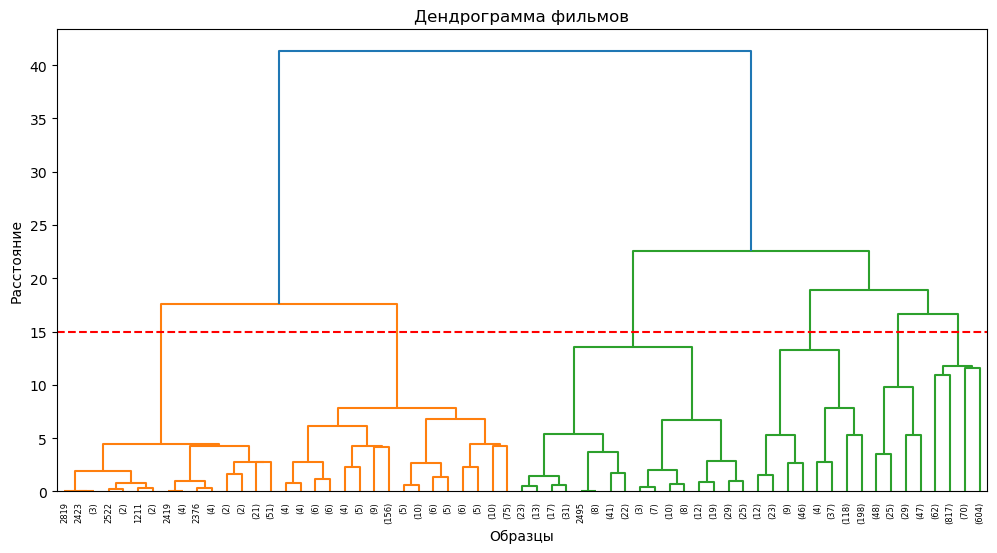

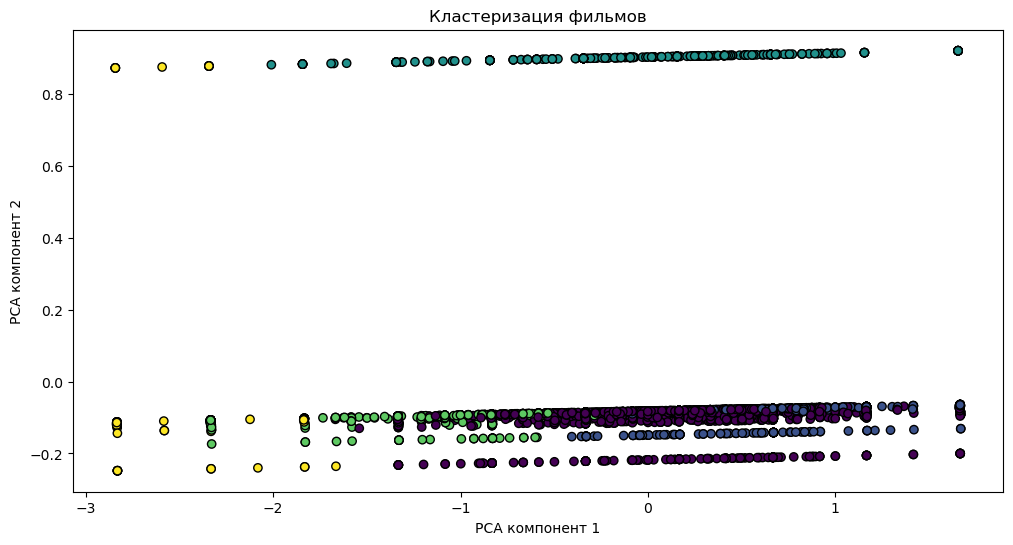

In [16]:
import pandas as pd

# Загрузка данных
movies_df = pd.read_csv("data/movies_metadata.csv", low_memory=False)
ratings_df = pd.read_csv("data/ratings_small.csv")

# Предобработка данных фильмов
movies_df = movies_df[['id', 'title', 'genres']].rename(columns={'id': 'movieId'})
ratings_df = ratings_df[['movieId', 'rating']]

# Конвертация типов данных
movies_df['movieId'] = pd.to_numeric(movies_df['movieId'], errors='coerce')
movies_df.dropna(subset=['movieId'], inplace=True)
movies_df['movieId'] = movies_df['movieId'].astype(int)

# Разделение жанров
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df = movies_df.explode('genres')

# Средние рейтинги
avg_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avg_ratings.columns = ['movieId', 'average_rating']
movies_df = pd.merge(movies_df, avg_ratings, on='movieId', how='inner')

# Преобразование жанров в числовые данные
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
genre_encoded = encoder.fit_transform(movies_df[['genres']])

import numpy as np
X = np.hstack((genre_encoded, movies_df[['average_rating']].values))

# Создание дендрограммы
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.axhline(y=15, color='r', linestyle='--')  # Оптимальный срез
plt.title("Дендрограмма фильмов")
plt.xlabel("Образцы")
plt.ylabel("Расстояние")
plt.show()

# Иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = clustering.fit_predict(X)

movies_df['Cluster'] = clusters

# Визуализация с использованием PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=movies_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title("Кластеризация фильмов")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.show()

### Задача 4:
Используйте набор данных Seeds для кластеризации различных сортов пшеницы. Данный набор данных содержит измерения геометрических свойств семян семи различных видов пшеницы. Ваша задача провести иерархическую кластеризацию и визуализировать результаты с помощью дендрограммы.

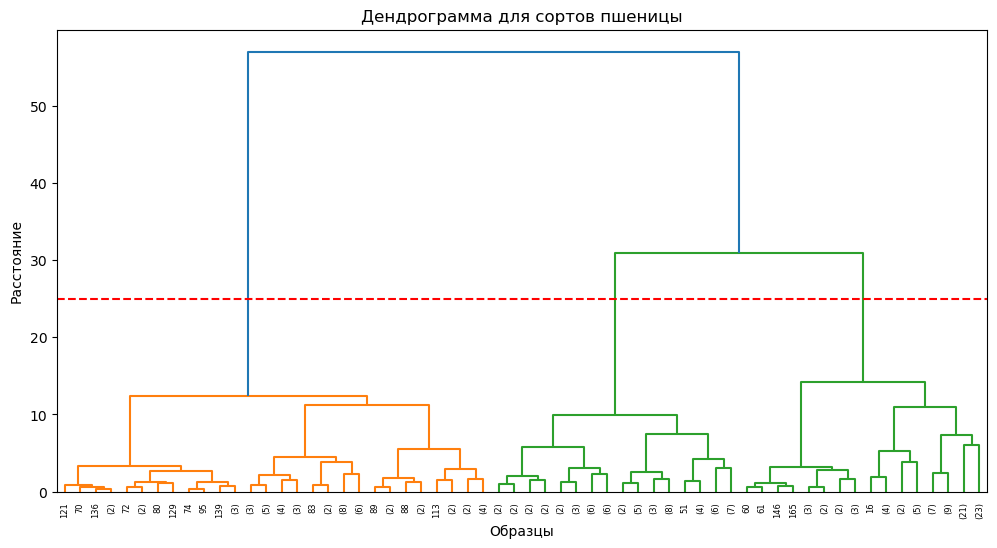

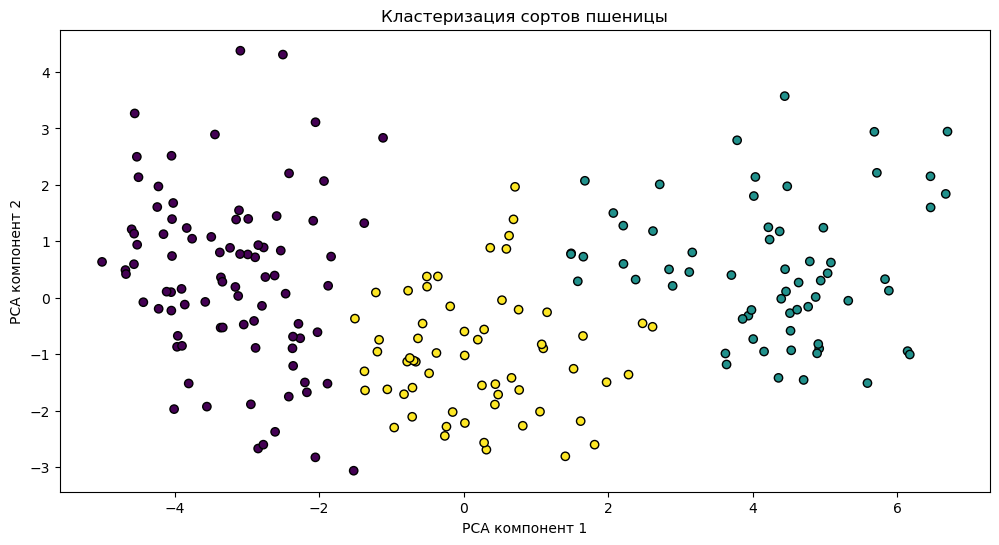

In [17]:
import pandas as pd

# Загрузка данных о пшенице
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["area", "perimeter", "compactness", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove", "class"]
seeds_df = pd.read_csv(url, sep=r'\s+', names=columns)

# Разделение признаков и целевой переменной
X_seeds = seeds_df.drop('class', axis=1)

# Строим дендрограмму
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked = linkage(X_seeds, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.axhline(y=25, color='r', linestyle='--')  # Оптимальный срез
plt.title("Дендрограмма для сортов пшеницы")
plt.xlabel("Образцы")
plt.ylabel("Расстояние")
plt.show()

# Иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
clustering_seeds = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters_seeds = clustering_seeds.fit_predict(X_seeds)

seeds_df['Cluster'] = clusters_seeds

# Визуализация кластеров с использованием PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_seeds_pca = pca.fit_transform(X_seeds)

plt.figure(figsize=(12, 6))
plt.scatter(X_seeds_pca[:, 0], X_seeds_pca[:, 1], c=seeds_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title("Кластеризация сортов пшеницы")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.show()

## DBSCAN
### Задача 1:
Используйте DBSCAN для кластеризации набора данных Iris. Сравните полученные результаты с изначальными метками. DBSCAN хорош для этой задачи, поскольку он может находить кластеры произвольной формы.

Adjusted Rand Index: 0.59


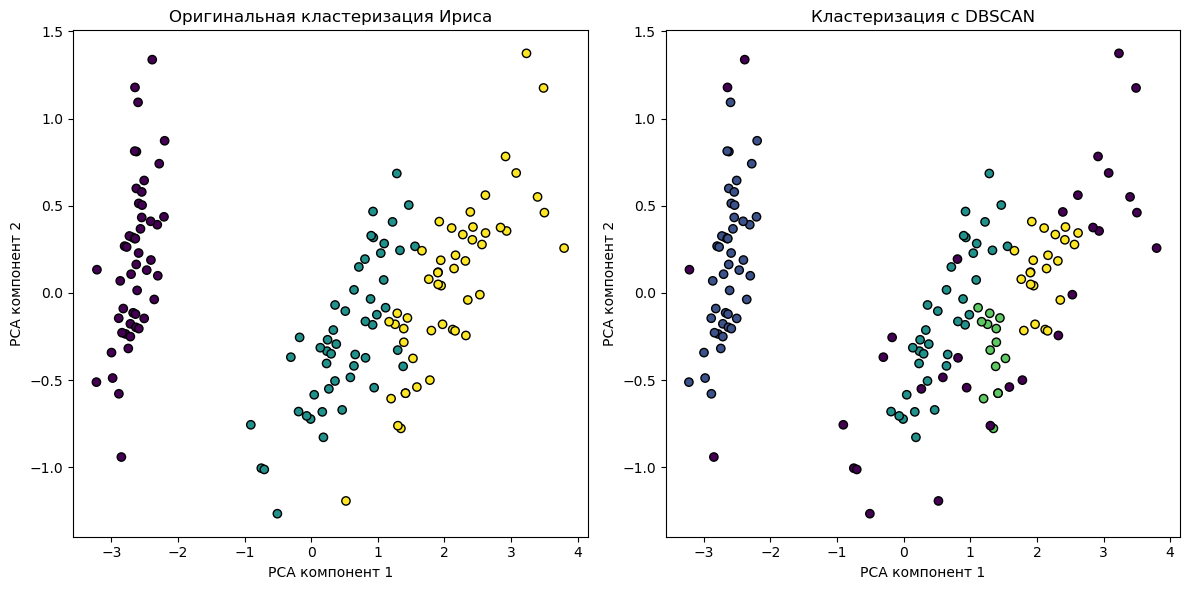

In [18]:
import pandas as pd
from sklearn.datasets import load_iris

# Загрузка данных о ирисах
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Признаки и целевая переменная
X_iris = iris_df.drop('target', axis=1)

# Кластеризация с DBSCAN
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.4, min_samples=5)
cluster_labels = dbscan_model.fit_predict(X_iris)

iris_df['Cluster'] = cluster_labels

# Оценка кластеризации с помощью Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(iris_df['target'], iris_df['Cluster'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Визуализация кластеров с использованием PCA
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
X_iris_pca = pca_model.fit_transform(X_iris)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=iris_df['target'], cmap='viridis', marker='o', edgecolor='k')
ax1.set_title("Оригинальная кластеризация Ириса")
ax1.set_xlabel("PCA компонент 1")
ax1.set_ylabel("PCA компонент 2")

ax2.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=iris_df['Cluster'], cmap='viridis', marker='o', edgecolor='k')
ax2.set_title("Кластеризация с DBSCAN")
ax2.set_xlabel("PCA компонент 1")
ax2.set_ylabel("PCA компонент 2")

plt.tight_layout()
plt.show()

### Задача 2:
Примените DBSCAN для кластеризации датасета Moons из библиотеки sklearn. Этот набор данных идеально подходит для демонстрации преимуществ DBSCAN, потому что он содержит два визуально различимых "месяца", и каждый из них должен стать отдельным кластером. 

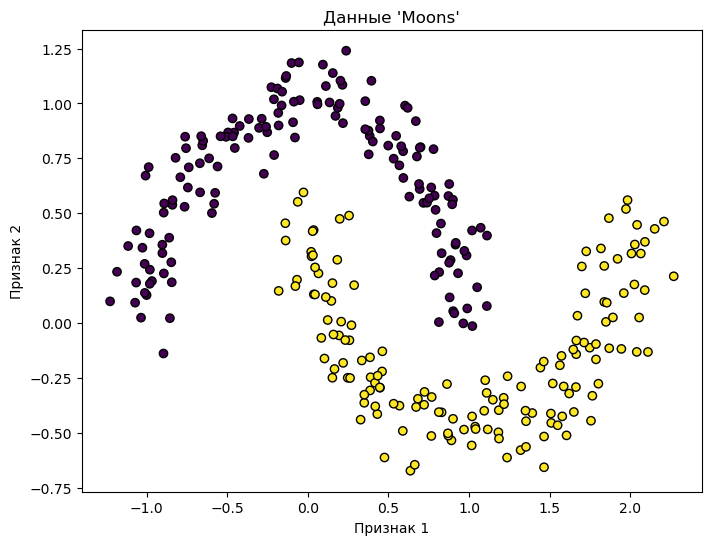

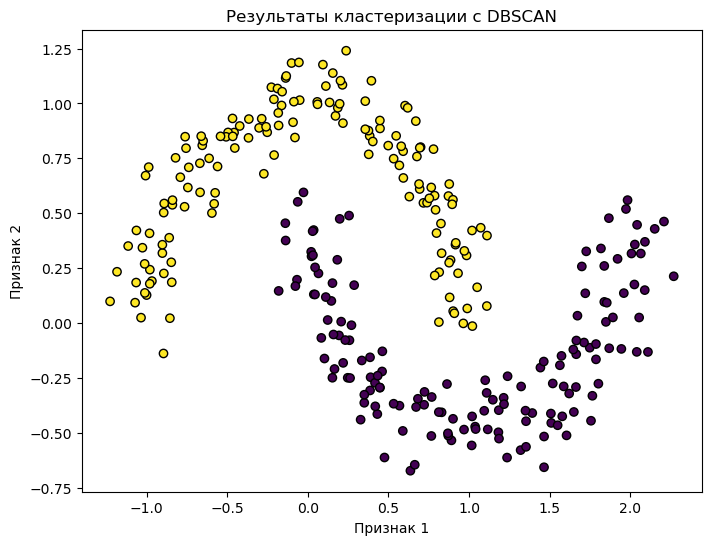

Adjusted Rand Index: 1.00


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Генерация данных "Moons"
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', edgecolor='k')
plt.title("Данные 'Moons'")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Кластеризация с использованием DBSCAN
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.2, min_samples=5)
clusters_moons = dbscan_model.fit_predict(X_moons)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=clusters_moons, cmap='viridis', edgecolor='k')
plt.title("Результаты кластеризации с DBSCAN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Оценка кластеризации с помощью Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_moons, clusters_moons)
print(f"Adjusted Rand Index: {ari:.2f}")


### Задача 3:
Используйте пакет DBSCAN в Python для кластеризации геолокационных данных. Целью будет выявление основных мест сбора/перехода на основе GPS-координат.

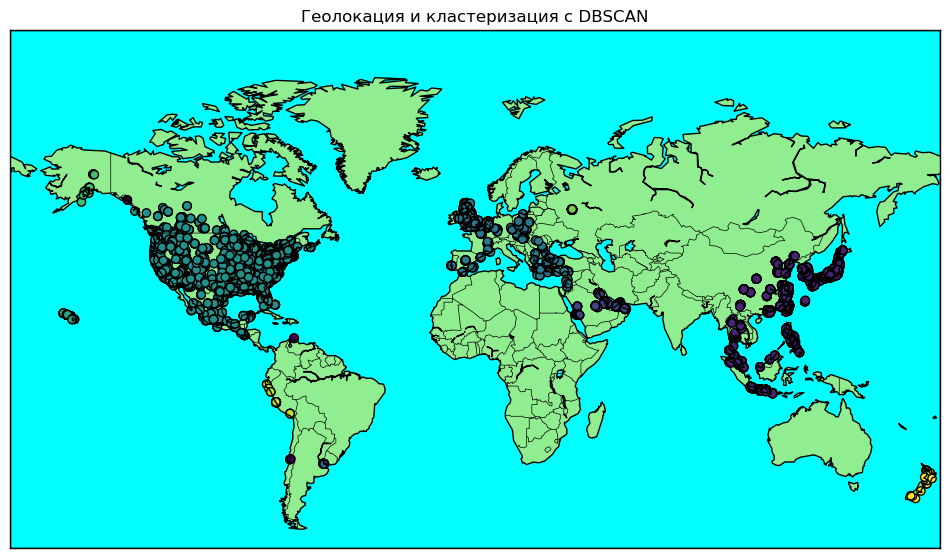

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import DBSCAN

# Загрузка и обработка данных
data = pd.read_csv("data/startbucks.csv")
data = data[['latitude', 'longitude']].dropna()
coordinates = data.to_numpy()

# Кластеризация с DBSCAN
dbscan_model = DBSCAN(eps=8, min_samples=10)
cluster_labels = dbscan_model.fit_predict(coordinates)
data['Cluster'] = cluster_labels

# Визуализация кластеров на карте
plt.figure(figsize=(12, 8))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Преобразование координат в формат карты
x, y = m(data['longitude'].values, data['latitude'].values)

# Отображение кластеров на карте
m.scatter(x, y, c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title("Геолокация и кластеризация с DBSCAN")
plt.show()

### Задача 4:
Используйте DBSCAN для кластеризации датасета с уникальной структурой -- Mouse (3y). Этот набор данных содержит координаты, которые образуют форму мыши, и DBSCAN может быть использован для обнаружения этой структуры.

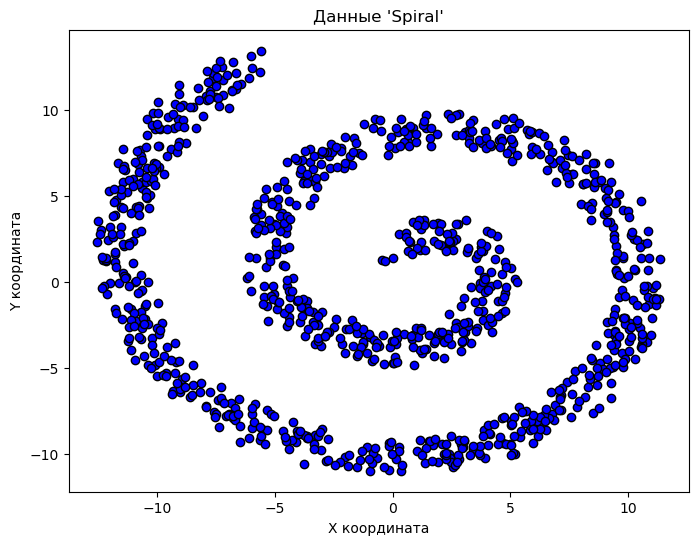

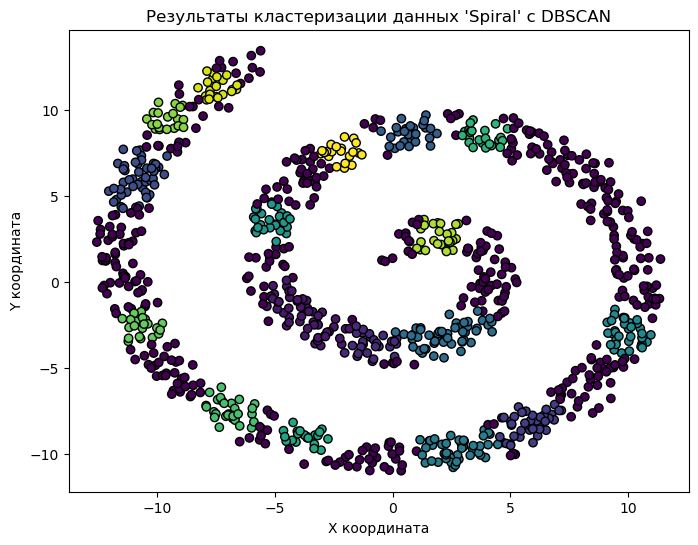

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Генерация спиральных данных
def generate_spiral_data(n_points, noise_level=0.5):
    np.random.seed(42)
    angles = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    x_spiral = -np.cos(angles) * angles + np.random.rand(n_points, 1) * noise_level
    y_spiral = np.sin(angles) * angles + np.random.rand(n_points, 1) * noise_level
    return np.hstack((x_spiral, y_spiral))

X_spiral = generate_spiral_data(1000, noise_level=2)

# Визуализация исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c='b', marker='o', edgecolor='k')
plt.title("Данные 'Spiral'")
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.show()

# Кластеризация с использованием DBSCAN
dbscan_model = DBSCAN(eps=1, min_samples=20)
cluster_labels_spiral = dbscan_model.fit_predict(X_spiral)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=cluster_labels_spiral, cmap='viridis', marker='o', edgecolor='k')
plt.title("Результаты кластеризации данных 'Spiral' с DBSCAN")
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.show()